# Test the Xarray-Iris `coord_system` solution

In [1]:
import iris
import xarray

from xarray_iris_coord_system import XarrayIrisCoordSystem as xics

#### Load a test file containing daily CSSP China data

In [2]:
fname = 'test_cssp.nc'
cube = iris.load_cube(fname, 'cloud_area_fraction')
cube

<iris 'Cube' of cloud_area_fraction / (1) (time: 3; grid_latitude: 219; grid_longitude: 286)>

#### Instatiate the `XarrayIrisCoordSystem` and use it to convert between an Iris `cube` and Xarray `DataArray`
Iris `coord_system` information is stored on the `DataArray` as the attribute `iris_coord_system`

In [3]:
xi = xics()

In [4]:
da = xi.from_iris(cube)
da

<xarray.DataArray 'cloud_area_fraction' (time: 3, grid_latitude: 219, grid_longitude: 286)>
dask.array<filled, shape=(3, 219, 286), dtype=float32, chunksize=(3, 219, 286), chunktype=numpy.ndarray>
Coordinates:
  * time                     (time) datetime64[ns] 1900-01-01T12:00:00 ... 1900-01-03T12:00:00
  * grid_latitude            (grid_latitude) float32 22.88 22.66 ... -25.08
  * grid_longitude           (grid_longitude) float32 323.48 323.7 ... 386.18002
    forecast_reference_time  datetime64[ns] ...
    forecast_period          (time) timedelta64[ns] ...
Attributes:
    standard_name:      cloud_area_fraction
    source:             Data from Met Office Unified Model
    Conventions:        CF-1.5
    STASH:              m01s02i204
    cell_methods:       time: mean (interval: 3 hour)
    iris_coord_system:  {"grid_north_pole_latitude": 51.81999969482422, "grid...

In [5]:
da.iris_coord_system

'{"grid_north_pole_latitude": 51.81999969482422, "grid_north_pole_longitude": 289.8299865722656, "ellipsoid": {"semi_major_axis": 6371229.0}, "coord_system_name": "rotated_latitude_longitude"}'

#### We can convert this `DataArray` back to a `cube` and the `coord_system` is retained

In [6]:
cube2 = xi.to_iris(da)
cube2

<iris 'Cube' of cloud_area_fraction / (unknown) (time: 3; grid_latitude: 219; grid_longitude: 286)>

In [7]:
print(cube2.coord_system())
print(cube.coord_system())

RotatedGeogCS(51.81999969482422, 289.8299865722656, ellipsoid=GeogCS(6371229.0))
RotatedGeogCS(51.81999969482422, 289.8299865722656, ellipsoid=GeogCS(6371229.0))


In [8]:
print(cube2.coord(axis='X').coord_system)
print(cube.coord(axis='X').coord_system)

RotatedGeogCS(51.81999969482422, 289.8299865722656, ellipsoid=GeogCS(6371229.0))
RotatedGeogCS(51.81999969482422, 289.8299865722656, ellipsoid=GeogCS(6371229.0))


#### Let's plot each `cube` to check that the data is located correctly

/Users/kevin.donkers/miniconda3/lib/python3.7/site-packages/iris/coords.py:1140: UserWarning: Coordinate 'grid_longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/Users/kevin.donkers/miniconda3/lib/python3.7/site-packages/iris/coords.py:1140: UserWarning: Coordinate 'grid_latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


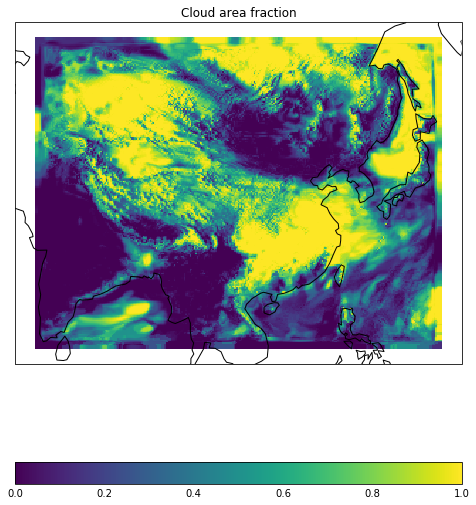

In [9]:
%matplotlib inline
import iris.quickplot as qplt
import matplotlib.pyplot as plt

qplt.pcolormesh(cube2[0])
plt.gca().coastlines()
plt.gcf().set_size_inches(8,12)

/Users/kevin.donkers/miniconda3/lib/python3.7/site-packages/iris/coords.py:1140: UserWarning: Coordinate 'grid_longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/Users/kevin.donkers/miniconda3/lib/python3.7/site-packages/iris/coords.py:1140: UserWarning: Coordinate 'grid_latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


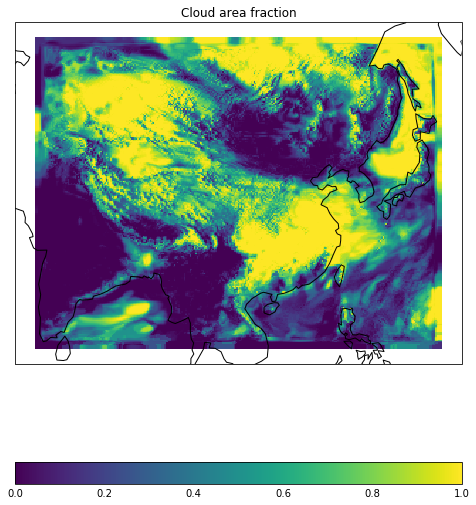

In [10]:
qplt.pcolormesh(cube[0])
plt.gca().coastlines()
plt.gcf().set_size_inches(8,12)